In [4]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
df = pd.read_csv('diabetes.csv')

## Data visualization and pre-processing

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
import seaborn as sns

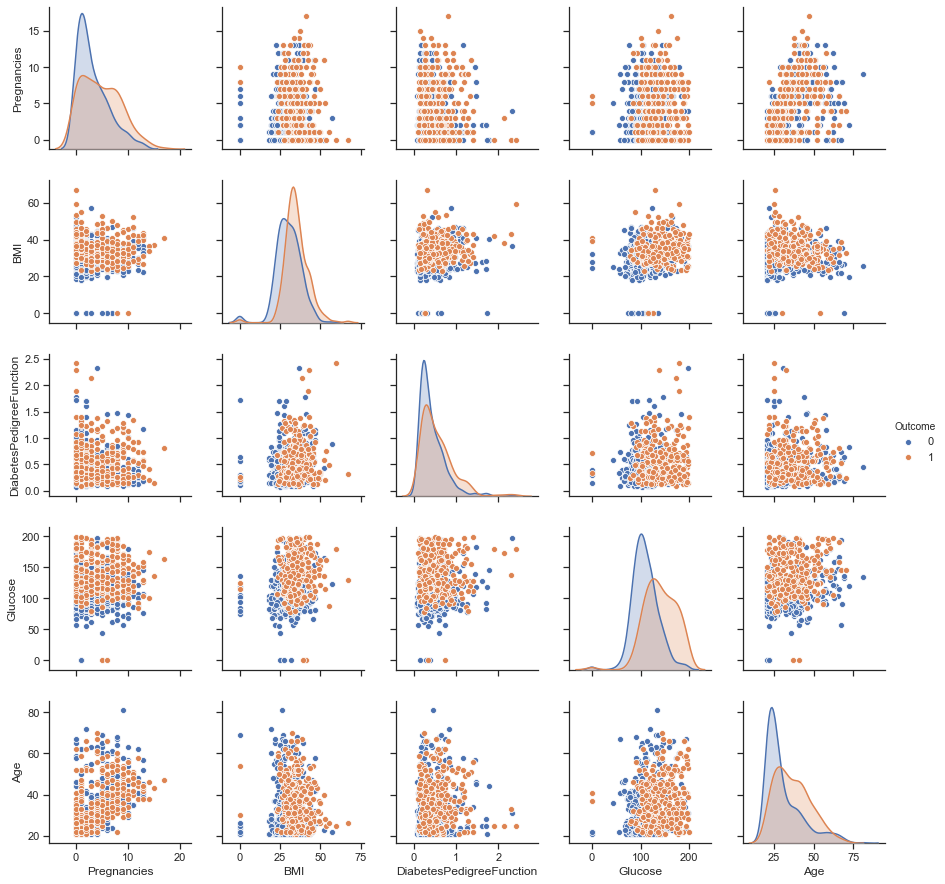

In [8]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, hue="Outcome",vars=['Pregnancies','BMI','DiabetesPedigreeFunction','Glucose','Age'] )


In [102]:
g.savefig("output.png")

## 3D scatter plot

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [10]:
df_select = df[['Pregnancies','BMI','DiabetesPedigreeFunction','Insulin']].to_numpy()

In [11]:
y=df.Outcome

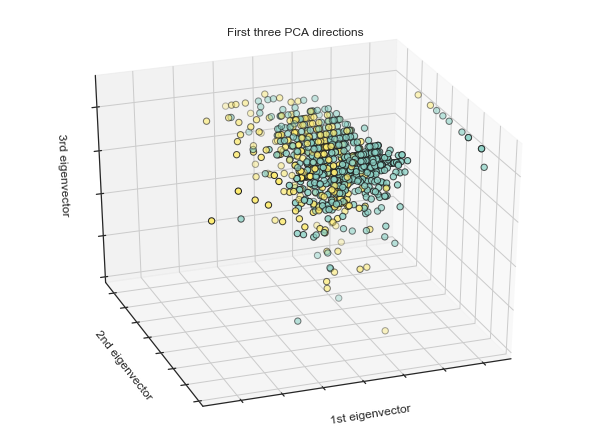

In [12]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(df_select)
ax.scatter(X_reduced[:, 1], X_reduced[:, 2], X_reduced[:, 0], c=y,
           cmap=plt.cm.Set3, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()


## heat map

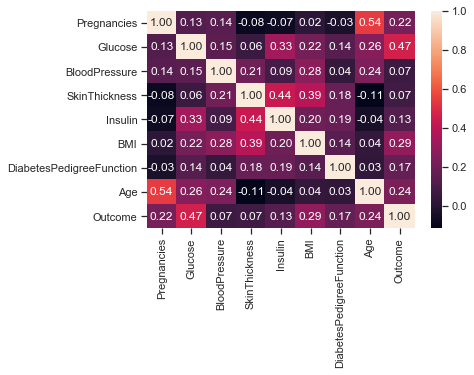

In [13]:
h = sns.heatmap(df.corr(), annot=True, fmt=".2f");

## extra tree classifier

C:\Users\subhorn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.11187483 0.24942467 0.09332182 0.07558101 0.07050805 0.14675097
 0.10519821 0.14734043]


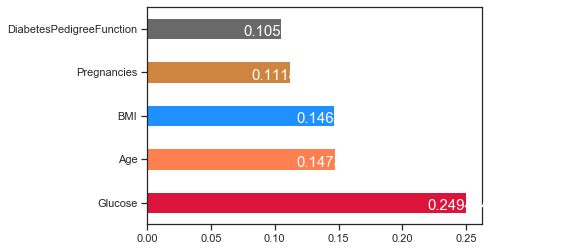

In [14]:
data=df
X = data.iloc[:,0:8]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
ax=feat_importances.nlargest(5).plot(kind='barh', color=tuple(["crimson", "coral","dodgerblue","peru","dimgrey"]))





# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()-.03, i.get_y()+.08, \
            i.get_width(), fontsize=15,
color='white')
    
plt.savefig('clasifier.png') 



plt.show()

In [57]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

X = data[['Pregnancies','BMI','DiabetesPedigreeFunction','Glucose','Age']] 
Y = data['Outcome']





## Normalize Data 

In [58]:
X= preprocessing.StandardScaler().fit(X).transform(X)

## Split data into training set and test set

we use the training set to build an accurate model and test set (validation) to evaluate model

In [62]:
validation_size = 0.30
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

print ('Train set:', X_train.shape,  Y_train.shape)
print ('validation set:', X_validation.shape,  Y_validation.shape)
 #inside training set
    
X_train, X_test, Y_train, Y_test =  model_selection.train_test_split(X_train,  Y_train, test_size=0.2, random_state=seed)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)


Train set: (537, 5) (537,)
validation set: (231, 5) (231,)
Train set: (429, 5) (429,)
Test set: (108, 5) (108,)


## Classification 

### 1. K Nearest Neighbor(KNN)

In [63]:
#1 Train Model with random k and X_train, y_train

from sklearn.neighbors import KNeighborsClassifier
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)

# Predict the model with X_test 
yhat = neigh.predict(X_test)

#accuracy evaluation within Train set and test set
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, yhat))

Train set Accuracy:  0.8298368298368298
Test set Accuracy:  0.7129629629629629


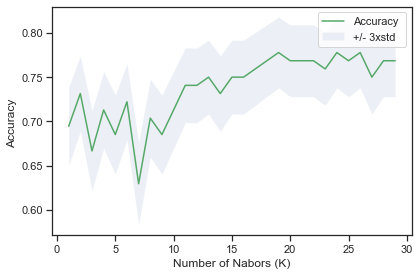

The best accuracy was with 0.7777777777777778 with k= 19


In [65]:
#2 find the best K

from sklearn import metrics
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [67]:
# update model to use k= 19
k=19
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)

### 2. Decision Tree

In [68]:
# modeling
from sklearn.tree import DecisionTreeClassifier
loantree = DecisionTreeClassifier(criterion="entropy", max_depth=5)

#training 
loantree.fit(X_train,Y_train)

#prediction from training data
predTree = loantree.predict(X_test)



### 3. Logistic Regression

In [69]:
# modeling 
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear')


# training
LR.fit(X_train,Y_train)

#prediction from training data
yhat_LR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

### 4. Support Vector Machine

In [72]:
# modeling
from sklearn import svm
loan = svm.SVC(kernel='rbf')

# training
loan.fit(X_train, Y_train) 

#prediction from training data
yhat_svm = loan.predict(X_test)

C:\Users\subhorn\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Model Evaluation using Validation set

In [70]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [78]:
# KNN
yhat_knn = neigh.predict(X_validation) 
f1_score(Y_validation, yhat_knn, average='weighted')
jaccard_similarity_score(Y_validation, yhat_knn)


C:\Users\subhorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.7555106621773289

In [79]:
# Decision tree
predTree = loantree.predict(X_validation)
jaccard_similarity_score(Y_validation, predTree)
f1_score(Y_validation,  predTree, average='weighted') 

C:\Users\subhorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.7277793414016324

In [80]:
# Support vector machine
yhat_svm = loan.predict(X_validation)
jaccard_similarity_score(Y_validation, yhat_svm)
f1_score(Y_validation,  yhat_svm, average='weighted') 

C:\Users\subhorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.7714705347949852

In [82]:
# Logistic regresssion
yhat_LR = LR.predict(X_validation)
yhat_prob = LR.predict_proba(X_validation)
jaccard_similarity_score(Y_validation, yhat_LR)
f1_score(Y_validation,  yhat_LR, average='weighted') 

C:\Users\subhorn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.7547260686333535

In [83]:
log_loss(Y_validation, yhat_prob)

0.548726013409631

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

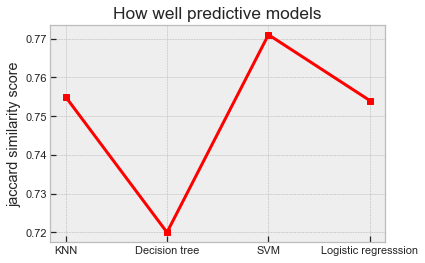

In [16]:
names = ['KNN', 'Decision tree', 'SVM', 'Logistic regresssion']
values = [0.755, 0.72,0.771,0.754]
plt.style.use('bmh')
plt.plot(names, values,marker="s",color='red', linewidth=3 )
plt.title('How well predictive models')
plt.ylabel('jaccard similarity score')
plt.savefig('report.png') 

